# Chapter 2 머신러닝 프로젝트 처음부터 끝까지
예제 프로젝트 진행 단계
1. 큰 그림 보기
2. 데이터 구하기
3. 데이터로부터 통찰 얻기 - 탐색, 시각화
4. 머신러닝 알고리을 위한 데이터 준비
5. 모델 선택, 훈련
6. 모델 상세 조정
7. 솔루션 제시
8. 시스템 런칭, 모니터링, 유지 보수

## 2.1 실제 데이터로 작업하기
실제 데이터를 구할 수 있는 사이트
* 유명한 공개 데이터 저장소
  * UC Irvine 머신러닝 저장소(http://archive.ics.uci.edu/ml)
  * Kaggle 데이터셋(http://www.kaggle.com/datasets)
  * 아마존 AWS 데이터셋(https://registry.opendata.aws)
* 메타 포털(공개 데이터 저장소가 나열되어 있다)
  * 데이터 포털(http://dataportals.org)
  * 오픈 데이터 모니터(http://opendatamonitor.eu)
  * 퀀들(Quandl)(http://quandl.com)
* 인기 있는 공개 데이터 저장소가 나열되어 있는 다른 페이지
  * 위키백과 머신러닝 데이터셋 목록(https://goo.gl/SJHN2k)
  * Quora.com(https://homl.info/10)
  * 데이터셋 서브레딧(http://www.reddit.com/r/datasets)


## 2.2 큰 그림 보기
캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델 만들기

### 2.2.1 문제 정의
* 지도 학습 - `레이블`된 훈련 샘플
* 다중 회귀 - 예측에 사용할 특성이 여러 개
* 단변량 회귀 - 각 구역마다 `하나`의 값 예측

### 2.2.2 성능 측정 지표 선택
`평균 제곱근 오차`(Root Mean Square Error, RMSE)
$$
RMSE(\mathbf X, h) = \sqrt{\frac{1}{m} \sum^{m}_{i=1} (h(\mathbf x ^{(i)})-y^{(i)})^2}
$$

`평균 절대 오차`(Mean Absolute Error, MAE)
$$
MAE(\mathbf X, h) = \frac {1}{m} \sum^{m}_{i=1} |h(\mathbf x ^{(i)})-y^{(i)}|
$$


### 2.2.3 가정 검사
동료들과 만든 가정을 나열하고 검사하기

## 2.3 데이터 가져오기

### 2.3.2 데이터 다운로드

In [130]:
import os

HOUSING_PATH = os.path.join('datasets', 'housing')

In [131]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

### 2.3.3 데이터 구조 훑어보기

In [132]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [133]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [134]:
# ocean_proximity 필드는 범주형(categorical)이다.
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [135]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


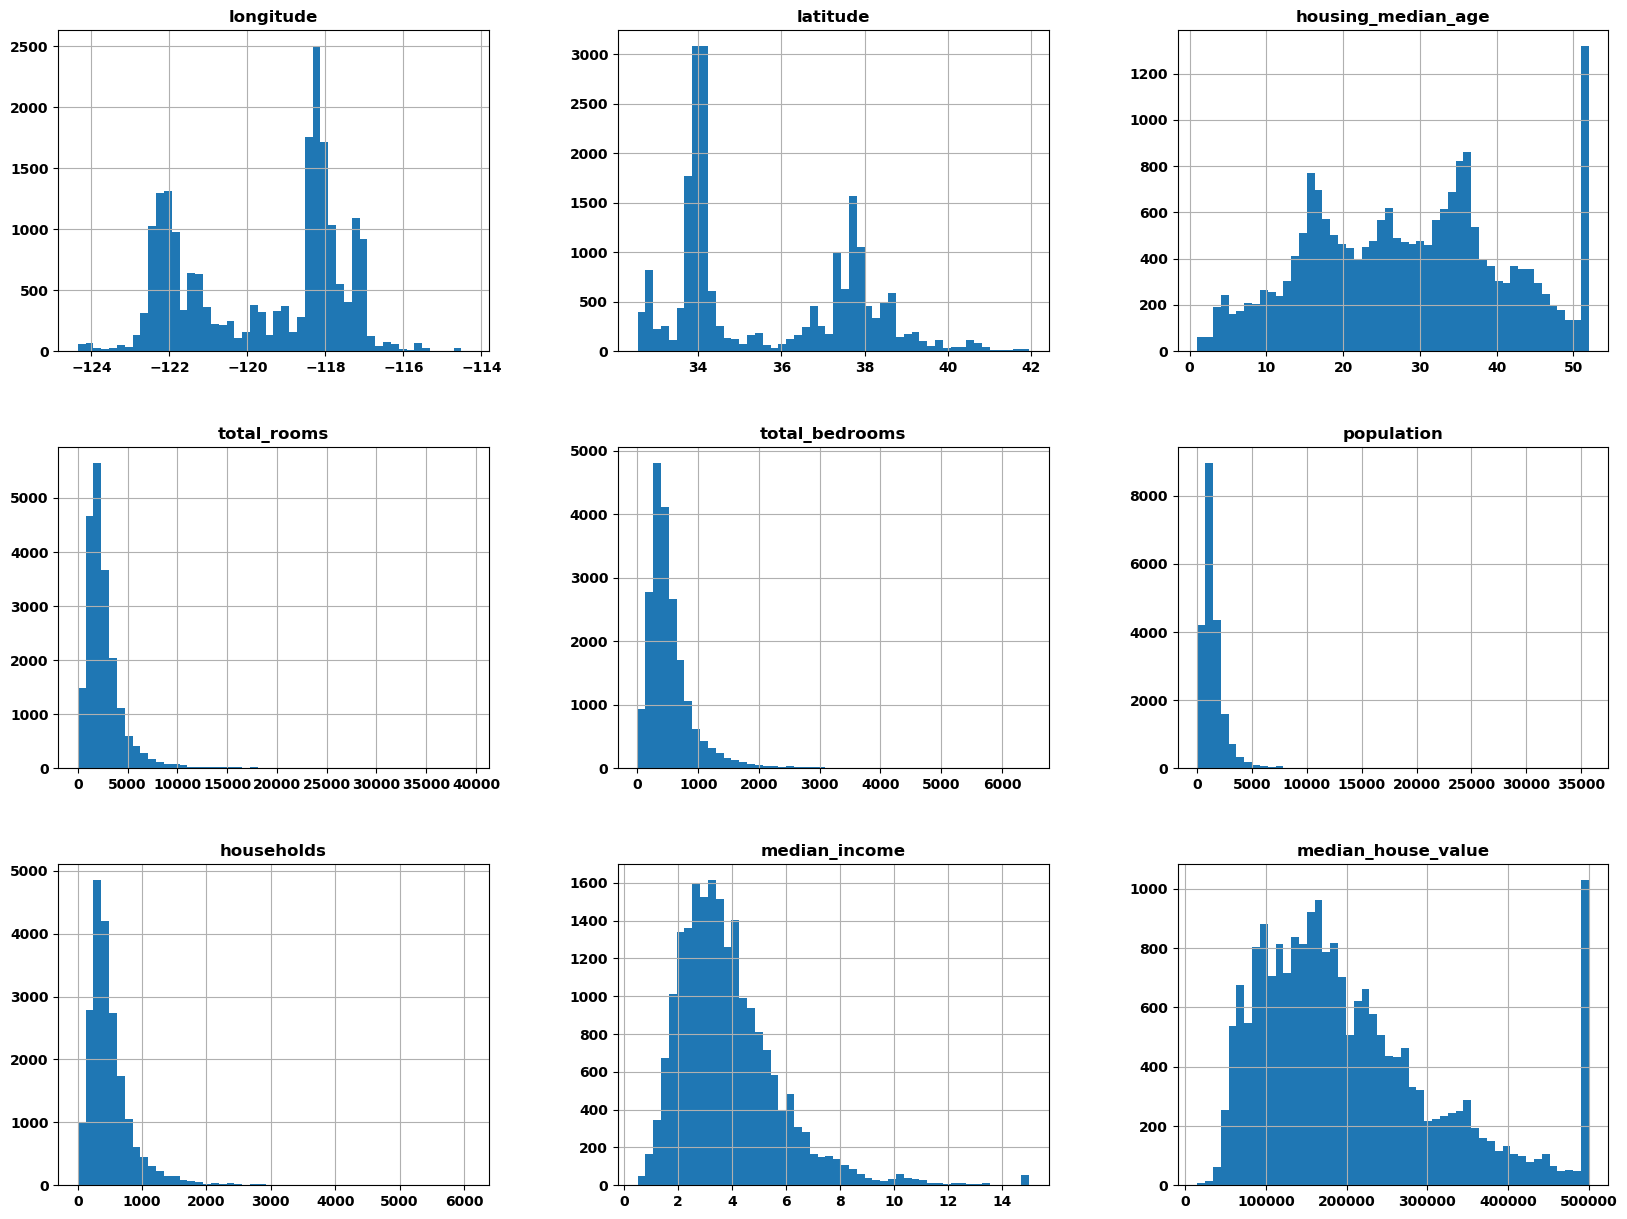

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

위 히스토그램의 특성 확인
1. median income 특성이 US 달러로 표현되어 있지 않다. 데이터를 취합한 팀에 확인해보니 스케일을 조정하고, 상한이 15(실제론 15.0001), 하한이 0.5(실제론 0.4999)가 되도록 만들었다고 한다. 대략 수만 달러를 나타낸다(3->3만달러). 머신러닝에서는 전처리된 데이터를 다루는 경우가 흔하고 이것이 문제가 되지는 않지만 데이터가 어떻게 계산된 것인지 반드시 이해하고 있어야한다.
2. housing median age 와 median house value 역시 최댓값과 최솟값을 한정했다. 중간 주택 가격의 경우는 타깃 속성(레이블)으로 사용되기 때문에 심각한 문제가 될 수 있다. 가격이 한곗값을 넘어가지 않도록 머신러닝 알고리즘이 학습될지도 모른다. 이것이 문제가 될지 안 될지는 클라이언트 팀(이 시스템의 출력을 사용할 팀)과 함계 검토하는 것이 좋다. 만약 그 팀에서 $500,000를 넘어가더라도 정확한 예측값이 필요한다고 한다면 우리가 선택할 수 있는 방법은 2가지 이다.
   1. 한곗값 밖의 구역에 대한 정확한 레이블을 구한다.
   2. 훈련 세트에서 이런 구역을 제거한다.($500,000가 넘는 값에 대한 예측은 평가 결과가 매우 나쁠 것이므로 테스트 세트에서도 제거한다.)
3. 특성들의 스케일이 서로 많이 다르다. 특성 스케일링에 대해서는 이 장의 뒷부분에서 살펴보겠다.
4. 마지막으로 많은 히스토그램의 꼬리가 두껍다. 가우데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있다. 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만든다. 나중에 이런 특성들을 좀 더 종 모양의 분포가 되도록 변형시키겠다.

### 2.3.4 테스트 세트 만들기

In [137]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [138]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [139]:
# sklearn 에서 제공하는 train_test_split 을 쓴다.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

16512
4128


`계층적 샘플링` - 모집단을 계층으로 나눈 후, 각 계층에서 무작위로 샘플을 추출하는 통계적 추출 방법. 즉, 각 계층의 비율을 맞춰 무작위로 샘플을 추출한다.

<AxesSubplot:>

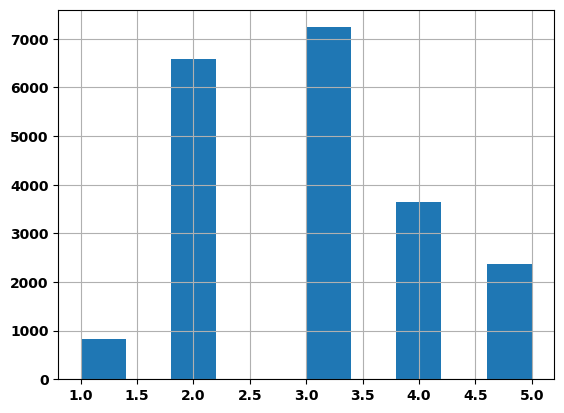

In [140]:
# pd.cut()을 사용하여 카테고리 5개를 가진 소득 카테고리 특성 생성
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing['income_cat'].hist()

In [141]:
# Stratified ShuffleSplit을 사용하여 소득 카테고리 기반으로 계층 샘플링하기
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [142]:
# test set에서의 비율
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [143]:
# train set에서의 비율 (test_set의 피율과 거의 동일함)
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [144]:
# income_cat 특성 삭제 
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## 2.4 데이터 이해를 위한 탐색, 시각화

In [145]:
# 훈련 세트를 손상시키지 않기 위해 복사본 사용
housing = strat_train_set.copy()

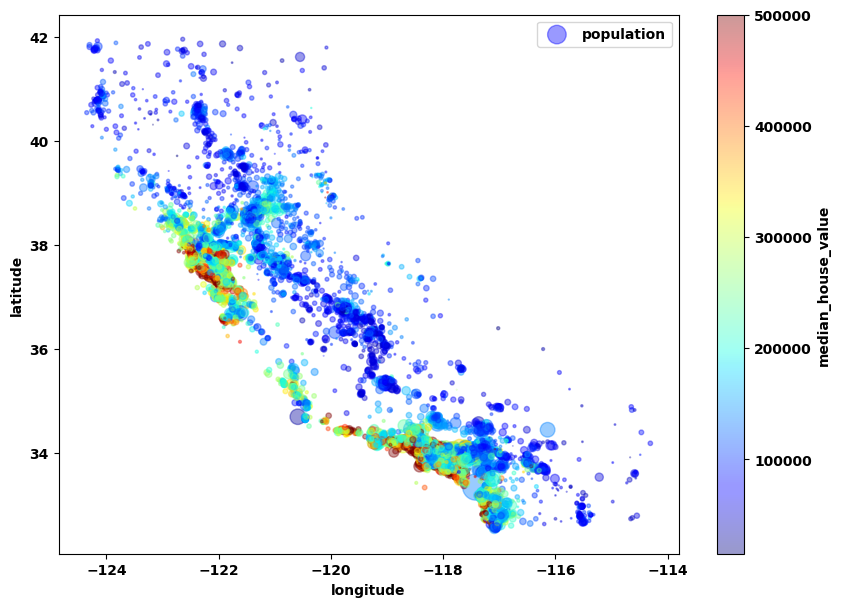

In [146]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population', figsize=(10, 7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

### 2.4.2 상관관계 조사
데이터세싱 너무 크지 않아 모든 특성 간 `표준 상관계수`(standard correlation coefficient)를 쉽게 계산할 수 있다.

In [147]:
corr_matrix = housing.corr()

In [148]:
# 값이 0에 가까울수록 관계가 약하다.
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

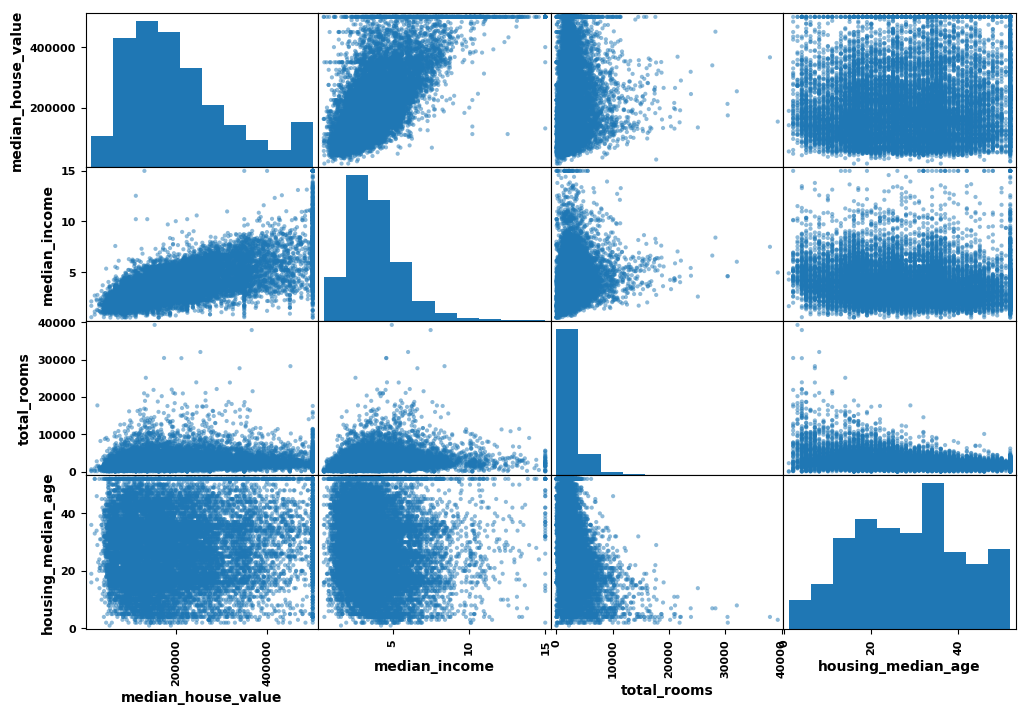

In [149]:
# 상관관계가 높아 보이는 특성 그래프
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

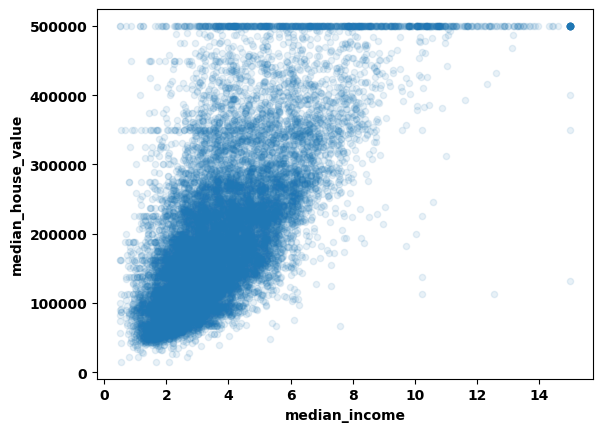

In [150]:
# 상관관계가 가장 뚜렷하게 보이는 특성 그래프
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

가격 제한값인 500,000과 이외 450,000, 350,000 에서 수평선이 보인다.  
이상한 데이터 이기때문에 제거하는 것이 좋다.

### 2.4.3 특성 조합 실험

In [151]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [152]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## 2.5 머신러닝 알고리즈을 위한 데이터 준비

In [153]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


In [154]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()

### 2.5.1 데이터 정제
누락된 정보가 있는 특성 처리
* 해당 구역 제거
* 전체 특성 삭제
* 어떤 값으로 채우기(0, 평균, 중간값)

In [155]:
# 해당 구역 제거
# housing.dropna(subset=['total_bedrooms'])
# 전체 특성 삭제
# housing.drop('total_bedrooms', axis=1)
# 어떤 값으로 채우기
# median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median, inplace=True)

In [156]:
# SimpleImputer로 누락된 값 쉽게 다루기
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [157]:
# 중간값은 수치형 특성만 계산 가능하기 때문에 텍스트 특성은 제외 한다.
housing_num = housing.drop('ocean_proximity', axis=1)

In [158]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [159]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [160]:
X = imputer.transform(housing_num)

In [161]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### 2.5.2 텍스트와 범주형 특성 다루기

In [162]:
# 카테고리를 숫자로 변환
# 이 방식은 서로 관련 없는 카테고리끼리 값이 가까이 있을 수 있기 때문에 문제가 생길 수 있다.
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[['ocean_proximity']]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [163]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [164]:
# 위 문제를 방지하기 위해 원-핫 인코딩을 쓴다.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
# 희소 행렬을 카테고리가 수 천개이상일 때 쓰면 효과적으로 저장할 수 있다.
# 희소 행렬은 1의 위치만을 저장하고 있다.

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [165]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### 2.5.3 변환기

In [166]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self     # 더 할 일이 없다.
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room =  X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### 2.5.4 특성 스케일링
모든 특성의 범위를 같도록 만들어 주는 방법
* min-max scaling(정규화, normalization)
* 표준화(standardization)

### 2.5.5 변환 파이프라인

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipline.fit_transform(housing_num)

In [168]:
# ColumnTransformer을 통해 각 열마다 적절한 변환을 적용할 수 있다.
from sklearn.compose import ColumnTransformer

num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

full_pipline = ColumnTransformer([
    ('num', num_pipline, num_attr),
    ('cat', OneHotEncoder(), cat_attr),
])

housing_prepared = full_pipline.fit_transform(housing)

## 2.6 모델 선택, 훈련

### 2.6.1 훈련 세트에서 훈련하고 평가하기

In [169]:
from sklearn.linear_model import LinearRegression

# 모델 훈련 - 선형 
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [170]:
# 모델 예측
some_data = housing.iloc[:5]
some_labels = housing_label[:5]
some_data_prepared = full_pipline.transform(some_data)
print(lin_reg.predict(some_data_prepared))
print(list(some_labels))

[ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
[72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [171]:
# 모델 RMSE 측정
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [172]:
#  다른 모델 선택 - 결정 트리
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [173]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 2.6.2 교차 검증을 사용한 평가

In [174]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [175]:
def display_scores(scores):
    print('점수: ', scores)
    print('평균: ', scores.mean())
    print('표준편차: ', scores.std())

In [176]:
display_scores(tree_rmse_scores)

점수:  [73014.85431339 69940.16029834 68406.18559861 71433.74034223
 70062.71880856 77352.4058876  71030.86833039 74888.85134494
 69200.54159583 69894.55687385]
평균:  71522.48833937442
표준편차:  2649.2393354680803


In [177]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
평균:  69104.07998247063
표준편차:  2880.3282098180657


In [178]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


점수:  [51530.15421389 48829.36284596 46813.51175671 51779.59297699
 47176.14751071 51599.60301576 52408.60847651 49674.79393403
 48424.29889639 54223.39016868]
평균:  50245.94637956192
표준편차:  2306.239590531672


## 2.7 모델 세부 튜닝

### 2.7.1 그리드 탐색

In [179]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [180]:
# 최적의 조합 확인
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 6, 'n_estimators': 30}
RandomForestRegressor(max_features=6, n_estimators=30)


In [181]:
# 평가 점수 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64707.18791792132 {'max_features': 2, 'n_estimators': 3}
55519.538462775396 {'max_features': 2, 'n_estimators': 10}
52678.383648165036 {'max_features': 2, 'n_estimators': 30}
61248.671712464115 {'max_features': 4, 'n_estimators': 3}
53031.94094988933 {'max_features': 4, 'n_estimators': 10}
50440.739354564816 {'max_features': 4, 'n_estimators': 30}
58335.05244385189 {'max_features': 6, 'n_estimators': 3}
52216.71026347015 {'max_features': 6, 'n_estimators': 10}
49866.12353345312 {'max_features': 6, 'n_estimators': 30}
58962.30846586644 {'max_features': 8, 'n_estimators': 3}
52787.358228503836 {'max_features': 8, 'n_estimators': 10}
50103.79310502601 {'max_features': 8, 'n_estimators': 30}
62235.22213809558 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54243.27240010128 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59317.16864888477 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53417.59284970183 {'bootstrap': False, 'max_features': 3, 'n_estimators

### 2.7.2 랜덤 탐색

### 2.7.3 앙상블 방법

### 2.7.4 최상의 모델과 오차 분석

In [182]:
# RandomForesRegressor가 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도 보기
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances 

array([7.58398848e-02, 7.10906324e-02, 4.36399387e-02, 1.73727982e-02,
       1.70814624e-02, 1.77588611e-02, 1.64977551e-02, 3.54223577e-01,
       5.69557870e-02, 1.06364557e-01, 5.91150239e-02, 1.18311426e-02,
       1.45057044e-01, 7.04136981e-05, 2.76965569e-03, 4.33146739e-03])

In [183]:
# 특성 이름 표시
extra_attr = ['rooms_per_hhold', 'pop per hhold', 'bedrooms_per_room']
cat_encoder = full_pipline.named_transformers_['cat']
cat_one_hot_attr = list(cat_encoder.categories_[0])
attr = num_attr + extra_attr + cat_one_hot_attr
sorted(zip(feature_importances, attr), reverse=True)

[(0.35422357656675646, 'median_income'),
 (0.14505704366056768, 'INLAND'),
 (0.10636455683544409, 'pop per hhold'),
 (0.07583988480868298, 'longitude'),
 (0.07109063235046581, 'latitude'),
 (0.05911502385904931, 'bedrooms_per_room'),
 (0.056955787042774465, 'rooms_per_hhold'),
 (0.04363993872234265, 'housing_median_age'),
 (0.017758861116516405, 'population'),
 (0.01737279817112176, 'total_rooms'),
 (0.017081462373738192, 'total_bedrooms'),
 (0.01649775509272921, 'households'),
 (0.011831142628071148, '<1H OCEAN'),
 (0.004331467388289918, 'NEAR OCEAN'),
 (0.00276965568533011, 'NEAR BAY'),
 (7.041369811979443e-05, 'ISLAND')]

### 2.7.5 테스트 세트로 시스템 평가

In [184]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

# X_test['rooms_per_household'] = np.arange(4128)
# X_test['bedrooms_per_room'] = np.arange(4128)
# X_test['population_per_household'] = np.arange(4128)

X_test_prepared = full_pipline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48083.25011128349


In [185]:
# 일반화 오차의 95% 신뢰 구간 계산
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2 
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([46080.02460718, 50006.29175144])

## 2.10 연습문제

### 1. 